In [2]:
import os
import numpy as np
import tensorflow as tf

In [2]:
home_path = 'C:/Users/user/Google 드라이브/AIFFEL/+Final project/'
file_path = os.path.join(home_path, 'tdata1.npy')

data = np.load(file_path)
data

array([[[[196],
         [189],
         [182],
         [177]],

        [[171],
         [165],
         [161],
         [156]],

        [[149],
         [144],
         [140],
         [135]],

        [[135],
         [132],
         [128],
         [126]]],


       [[[ 98],
         [100],
         [ 99],
         [101]],

        [[100],
         [101],
         [101],
         [100]],

        [[ 97],
         [ 97],
         [ 98],
         [ 98]],

        [[101],
         [101],
         [102],
         [102]]],


       [[[ 59],
         [ 64],
         [ 65],
         [ 66]],

        [[ 69],
         [ 75],
         [ 71],
         [ 74]],

        [[ 71],
         [ 74],
         [ 75],
         [ 77]],

        [[ 79],
         [ 79],
         [ 80],
         [ 80]]],


       ...,


       [[[653],
         [605],
         [542],
         [508]],

        [[441],
         [401],
         [370],
         [334]],

        [[311],
         [269],
         [247],
        

In [3]:
data.shape

(1530, 4, 4, 1)

In [4]:
red_data = np.squeeze(data, axis = 3)
red_data.shape

(1530, 4, 4)

In [5]:
red_data

array([[[196, 189, 182, 177],
        [171, 165, 161, 156],
        [149, 144, 140, 135],
        [135, 132, 128, 126]],

       [[ 98, 100,  99, 101],
        [100, 101, 101, 100],
        [ 97,  97,  98,  98],
        [101, 101, 102, 102]],

       [[ 59,  64,  65,  66],
        [ 69,  75,  71,  74],
        [ 71,  74,  75,  77],
        [ 79,  79,  80,  80]],

       ...,

       [[653, 605, 542, 508],
        [441, 401, 370, 334],
        [311, 269, 247, 226],
        [209, 197, 170, 145]],

       [[771, 745, 712, 685],
        [676, 646, 631, 610],
        [580, 560, 527, 499],
        [469, 445, 428, 416]],

       [[155, 144, 147, 145],
        [147, 157, 141, 153],
        [147, 154, 147, 138],
        [148, 134, 140, 144]]], dtype=int64)

In [6]:
red_data_00 = red_data[:][:][0]
red_data_00

array([[196, 189, 182, 177],
       [171, 165, 161, 156],
       [149, 144, 140, 135],
       [135, 132, 128, 126]], dtype=int64)

In [7]:
red_data_01 = red_data[:][:][1]
red_data_01

array([[ 98, 100,  99, 101],
       [100, 101, 101, 100],
       [ 97,  97,  98,  98],
       [101, 101, 102, 102]], dtype=int64)

In [8]:
red_data_09 = red_data[1529][:][:]
red_data_09

array([[155, 144, 147, 145],
       [147, 157, 141, 153],
       [147, 154, 147, 138],
       [148, 134, 140, 144]], dtype=int64)

In [9]:
red_data[1529,:,:]


array([[155, 144, 147, 145],
       [147, 157, 141, 153],
       [147, 154, 147, 138],
       [148, 134, 140, 144]], dtype=int64)

In [10]:
rank2_red_data = np.ravel(red_data, order = 'F')
rank2_red_data

array([196,  98,  59, ..., 145, 416, 144], dtype=int64)

In [11]:
rank2_red_data.shape

(24480,)

In [12]:
raveled_data = np.ravel(data, order = 'c')
raveled_data

array([196, 189, 182, ..., 134, 140, 144], dtype=int64)

In [13]:
reshaped_raveled_data = raveled_data.reshape(96, 255)
print(reshaped_raveled_data.shape)
reshaped_raveled_data

(96, 255)


array([[196, 189, 182, ...,  92,  96,  95],
       [ 98,  51,  56, ...,  61,  65,  67],
       [ 68,  74, 102, ...,  78,  78,  85],
       ...,
       [  0,   0,   0, ...,   0, 734, 678],
       [635, 598, 559, ..., 336, 324, 643],
       [608, 588, 549, ..., 134, 140, 144]], dtype=int64)

In [14]:

reshaped_raveled_data = reshaped_raveled_data.astype('uint8')  # uint8 이어야 filtering이 원활히 된다.
print('재조정된 데이터 쉐입: ',reshaped_raveled_data.shape)
reshaped_raveled_data 

재조정된 데이터 쉐입:  (96, 255)


array([[196, 189, 182, ...,  92,  96,  95],
       [ 98,  51,  56, ...,  61,  65,  67],
       [ 68,  74, 102, ...,  78,  78,  85],
       ...,
       [  0,   0,   0, ...,   0, 222, 166],
       [123,  86,  47, ...,  80,  68, 131],
       [ 96,  76,  37, ..., 134, 140, 144]], dtype=uint8)

데이터 이미지화


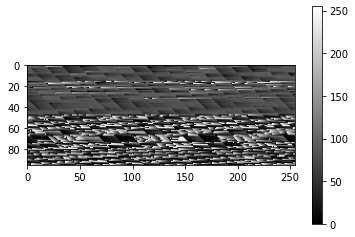

In [15]:
from matplotlib import pyplot as plt

print('데이터 이미지화')
plt.imshow(reshaped_raveled_data , cmap='gray')
plt.colorbar();

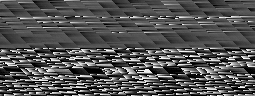

In [16]:
from PIL import Image
from PIL import ImageFilter


# numpy array를 이미지로 읽어옴.
image = Image.fromarray(reshaped_raveled_data)
image

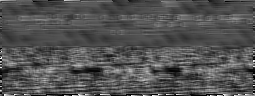

In [17]:
image_BLUR = image.filter(ImageFilter.BLUR)
image_BLUR

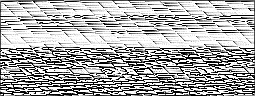

In [18]:
image_CONTOUR = image.filter(ImageFilter.CONTOUR)
image_CONTOUR

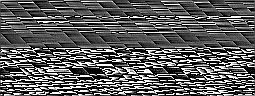

In [19]:
image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)
image_EDGE_ENHANCE

In [20]:
blur_array_reshaped_raveled_data = np.array(image_BLUR)
print(blur_array_reshaped_raveled_data.shape)

blur_array_reshaped_raveled_data = np.array(image_BLUR)
contour_array_reshaped_raveled_data = np.array(image_CONTOUR)
edge_enhance_array_reshaped_raveled_data = np.array(image_EDGE_ENHANCE)

(96, 255)


In [21]:
stack_data = np.column_stack((reshaped_raveled_data, blur_array_reshaped_raveled_data))
stack_data.shape

(96, 510)

In [22]:
import copy

# stack_data = copy.deepcopy(reshaped_raveled_data)
stack_data = np.expand_dims(reshaped_raveled_data, axis = 2)
stack_data.shape

(96, 255, 1)

In [23]:
blur_stack_data = np.expand_dims(blur_array_reshaped_raveled_data, axis = 2)
blur_stack_data.shape

(96, 255, 1)

In [24]:
contour_stack_data = np.expand_dims(contour_array_reshaped_raveled_data, axis = 2)
contour_stack_data.shape

(96, 255, 1)

In [25]:
edge_enhance_stack_data = np.expand_dims(edge_enhance_array_reshaped_raveled_data, axis = 2)
edge_enhance_stack_data.shape

(96, 255, 1)

In [26]:
stack_data = np.concatenate((stack_data, blur_stack_data), axis = 2)
stack_data = np.concatenate((stack_data, contour_stack_data), axis = 2)
stack_data = np.concatenate((stack_data, edge_enhance_stack_data), axis = 2)

stack_data.shape

(96, 255, 4)

In [27]:
stack_data[:,:,0]

array([[196, 189, 182, ...,  92,  96,  95],
       [ 98,  51,  56, ...,  61,  65,  67],
       [ 68,  74, 102, ...,  78,  78,  85],
       ...,
       [  0,   0,   0, ...,   0, 222, 166],
       [123,  86,  47, ...,  80,  68, 131],
       [ 96,  76,  37, ..., 134, 140, 144]], dtype=uint8)

In [28]:
import math

 

# 점과 점 사이의 거리 구하는 함수
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result


# 두 점의 좌표를 정한다.
P1 = (4, 1)
P2 = (2, 3)

 

#함수 호출
d = distance(P1[0], P1[1], P2[0], P2[1])

print(d)

2.8284271247461903


In [29]:
class point2d:
    def __init__(self, x, y, current_pressure):
        self.x = x
        self.y = y
        self.current_pressure = current_pressure
#         self.x_prev_pressure = x_prev_pressure
#         self.y_prev_pressure = y_prev_pressure
#         self.x_next_pressure = x_next_pressure
#         self.y_next_pressure = y_next_pressure
        self.x_prev_pressure = 0 # 초기값 설정
        self.y_prev_pressure = 0 # 초기값 설정
        self.x_next_pressure = 0 # 초기값 설정
        self.y_next_pressure = 0 # 초기값 설정
        self.x_pressure_gradient = 0 #self.x_next_pressure - self.x_prev_pressure
        self.y_pressure_gradient = 0 #self.y_next_pressure - self.y_prev_pressure
        self.magnitude = 0 #distance(self.x_prev_pressure, self.y_prev_pressure, self.x_next_pressure, self.y_next_pressure)
        self.angle = 0
#         if self.x_pressure_gradient == 0: # 예외처리
#             self.angle = 0 # 0으로 초기화
#         else:
#             self.angle = np.arctan(self.y_pressure_gradient/self.x_pressure_gradient)
        
p1 = point2d(30, 20, 40)
print(p1)

In [30]:
p1.x

30

In [32]:
p1.current_pressure

40

In [33]:
input_length = len(raveled_data)
input_length

24480

In [34]:
raveled_data[0]

196

In [36]:
pixel_list = []
column_num = 8 # 8x8 기준.
for i in range(input_length):
    pixel_info = point2d(i,i,None)
    pixel_info.x = pixel_info.x%column_num+1    # 2차원 기준, x 좌표 부여. column_num으로 끊음.
    pixel_info.y = pixel_info.y//column_num+1   # 2차원 기준, y 좌표 부여. column_num으로 끊음.
    pixel_info.current_pressure = raveled_data[i]
    
    if pixel_info.x > 1: # x축 최소값 초과시 직전 픽셀 입력. 최소값이면 기본값 0 부여.
        pixel_info.x_prev_pressure = raveled_data[i-1] 
    
    if pixel_info.x < column_num: # y축 최소값 초과시 직전 픽셀 입력. 최소값이면 기본값 0 부여.
        pixel_info.x_next_pressure = raveled_data[i+1]
        
    if pixel_info.y > 1: # x축 최대값 미달시 직후 픽셀 입력. 최대값이면 기본값 0 부여.
        pixel_info.y_prev_pressure = raveled_data[i-column_num]
        
    if pixel_info.y < column_num: # y축 최대값 미달시 직후 픽셀 입력. 최대값이면 기본값 0 부여.
        pixel_info.y_next_pressure = raveled_data[i+column_num]

    pixel_info.x_pressure_gradient = pixel_info.x_next_pressure - pixel_info.x_prev_pressure
    pixel_info.y_pressure_gradient = pixel_info.y_next_pressure - pixel_info.y_prev_pressure
    pixel_info.magnitude = distance(pixel_info.x_prev_pressure, pixel_info.y_prev_pressure, 
                                  pixel_info.x_next_pressure, pixel_info.y_next_pressure)
    if pixel_info.x_pressure_gradient == 0: # 예외처리
        pass
    else:
        pixel_info.angle = np.arctan(pixel_info.y_pressure_gradient/pixel_info.x_pressure_gradient)
        
    pixel_list.append(pixel_info)
    
pixel_list[0].current_pressure


196

In [47]:
pixel_pos = 0
print("현재 픽셀의 좌표: ({},{})".format(pixel_list[pixel_pos].x, pixel_list[pixel_pos].y))

print("현재 픽셀의 압력: ", pixel_list[pixel_pos].current_pressure)
print("x축 직전 픽셀의 압력: ", pixel_list[pixel_pos].x_prev_pressure)
print("y축 직전 픽셀의 압력: ", pixel_list[pixel_pos].y_prev_pressure)
print("x축 직후 픽셀의 압력: ", pixel_list[pixel_pos].x_next_pressure)
print("y축 직후 픽셀의 압력: ", pixel_list[pixel_pos].y_next_pressure)
print("x축 압력 기울기: ", pixel_list[pixel_pos].x_pressure_gradient)
print("y축 압력 기울기: ", pixel_list[pixel_pos].y_pressure_gradient)
print("압력 그래디언트의 크기: ", pixel_list[pixel_pos].magnitude)
print("압력 그래디언트의 각도: ", pixel_list[pixel_pos].angle)

현재 픽셀의 좌표: (1,1)
현재 픽셀의 압력:  196
x축 직전 픽셀의 압력:  0
y축 직전 픽셀의 압력:  0
x축 직후 픽셀의 압력:  189
y축 직후 픽셀의 압력:  149
x축 압력 기울기:  189
y축 압력 기울기:  149
압력 그래디언트의 크기:  240.66989840858787
압력 그래디언트의 각도:  0.6676028415268624


In [48]:
pixel_pos = 1
print("현재 픽셀의 좌표: ({},{})".format(pixel_list[pixel_pos].x, pixel_list[pixel_pos].y))

print("현재 픽셀의 압력: ", pixel_list[pixel_pos].current_pressure)
print("x축 직전 픽셀의 압력: ", pixel_list[pixel_pos].x_prev_pressure)
print("y축 직전 픽셀의 압력: ", pixel_list[pixel_pos].y_prev_pressure)
print("x축 직후 픽셀의 압력: ", pixel_list[pixel_pos].x_next_pressure)
print("y축 직후 픽셀의 압력: ", pixel_list[pixel_pos].y_next_pressure)
print("x축 압력 기울기: ", pixel_list[pixel_pos].x_pressure_gradient)
print("y축 압력 기울기: ", pixel_list[pixel_pos].y_pressure_gradient)
print("압력 그래디언트의 크기: ", pixel_list[pixel_pos].magnitude)
print("압력 그래디언트의 각도: ", pixel_list[pixel_pos].angle)

현재 픽셀의 좌표: (2,1)
현재 픽셀의 압력:  189
x축 직전 픽셀의 압력:  196
y축 직전 픽셀의 압력:  0
x축 직후 픽셀의 압력:  182
y축 직후 픽셀의 압력:  144
x축 압력 기울기:  -14
y축 압력 기울기:  144
압력 그래디언트의 크기:  144.6789549312546
압력 그래디언트의 각도:  -1.4738786990005337


In [49]:
pixel_pos = 8
print("현재 픽셀의 좌표: ({},{})".format(pixel_list[pixel_pos].x, pixel_list[pixel_pos].y))

print("현재 픽셀의 압력: ", pixel_list[pixel_pos].current_pressure)
print("x축 직전 픽셀의 압력: ", pixel_list[pixel_pos].x_prev_pressure)
print("y축 직전 픽셀의 압력: ", pixel_list[pixel_pos].y_prev_pressure)
print("x축 직후 픽셀의 압력: ", pixel_list[pixel_pos].x_next_pressure)
print("y축 직후 픽셀의 압력: ", pixel_list[pixel_pos].y_next_pressure)
print("x축 압력 기울기: ", pixel_list[pixel_pos].x_pressure_gradient)
print("y축 압력 기울기: ", pixel_list[pixel_pos].y_pressure_gradient)
print("압력 그래디언트의 크기: ", pixel_list[pixel_pos].magnitude)
print("압력 그래디언트의 각도: ", pixel_list[pixel_pos].angle)


현재 픽셀의 좌표: (1,2)
현재 픽셀의 압력:  149
x축 직전 픽셀의 압력:  0
y축 직전 픽셀의 압력:  196
x축 직후 픽셀의 압력:  144
y축 직후 픽셀의 압력:  98
x축 압력 기울기:  144
y축 압력 기울기:  -98
압력 그래디언트의 크기:  174.18381095842403
압력 그래디언트의 각도:  -0.5975564529851647


In [38]:
pixel_array = np.array(pixel_list).reshape(8, 3060)
pixel_array.shape

(8, 3060)

NameError: name 'coordinate_array' is not defined

In [3]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

11501568/11490434 [==============================] - 2s 0us/step


In [7]:
train_examples.shape

(60000, 28, 28)

In [14]:
train_labels.shape

(60000,)

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [16]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 3.5582 - sparse_categorical_accuracy: 0.8812
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5537 - sparse_categorical_accuracy: 0.9317
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.9473
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.9570
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.9619
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2647 - sparse_categorical_accuracy: 0.9662
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2490 - sparse_categorical_accuracy: 0.9696
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2406 - sparse_categorical_accuracy: 0.9728
Epoch 9/10
938/938 [============================